In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.helpers import melt_df

mls_bpr = pd.read_csv('./output/ranking_algo_exp/ml-latest-small_bpr.csv')
mls_lgcn = pd.read_csv('./output/ranking_algo_exp/ml-latest-small_lgcn.csv')

personality_bpr = pd.read_csv('./output/ranking_algo_exp/personality_bpr.csv')
personality_lgcn = pd.read_csv('./output/ranking_algo_exp/personality_lgcn.csv')

ml1m_bpr = pd.read_csv('./output/ranking_algo_exp/ml-1m_bpr.csv')
ml1m_lgcn = pd.read_csv('./output/ranking_algo_exp/ml-1m_lgcn.csv')

ml_bpr = pd.read_csv('./output/ranking_algo_exp/ml-latest_bpr.csv')
ml_lgcn = pd.read_csv('./output/ranking_algo_exp/ml-latest_lgcn.csv')

In [2]:
ml_lgcn

,uid,nbhd,nbhd_size,equiv_size,precision_nbhd,precision_equiv,recall_nbhd,recall_equiv,f1_nbhd,f1_equiv
0,6,"[99, 105, 126, 157, 221, 258, 272, 283, 341, 470]",7,31864,0.400000,0.679039,0.600000,0.807499,0.480000,0.737719
1,8,"[59, 72, 92, 111, 189, 258, 280, 360, 369, 495]",25,31846,0.593750,0.678968,0.875000,0.807341,0.707447,0.737611
2,14,"[16, 92, 141, 162, 165, 194, 219, 260, 348, 364]",9,31863,0.738095,0.678859,0.857143,0.807361,0.793177,0.737555
3,16,"[14, 99, 151, 303, 338, 362, 376, 444, 482, 513]",23,31848,0.643333,0.678936,0.900000,0.807303,0.750324,0.737576
4,30,"[46, 82, 213, 219, 268, 312, 353, 421, 449, 507]",26,31847,0.458333,0.679076,0.589286,0.807569,0.515625,0.737770
...,...,...,...,...,...,...,...,...,...,...
2941,15979,"[79, 138, 174, 389, 396, 408, 488, 502, 589, 605]",49,31824,0.888889,0.678712,0.804056,0.807398,0.844347,0.737483
2942,15983,"[26, 36, 104, 160, 164, 185, 219, 227, 300, 301]",28,31844,0.570370,0.678998,0.722222,0.807472,0.637377,0.737683
2943,15990,"[10, 31, 39, 192, 218, 219, 225, 300, 345, 360]",18,31854,0.583333,0.678996,0.800000,0.807403,0.674699,0.737653
2944,15993,"[34, 76, 197, 275, 276, 280, 338, 350, 351, 366]",20,31853,0.422222,0.679054,0.666667,0.807480,0.517007,0.737719


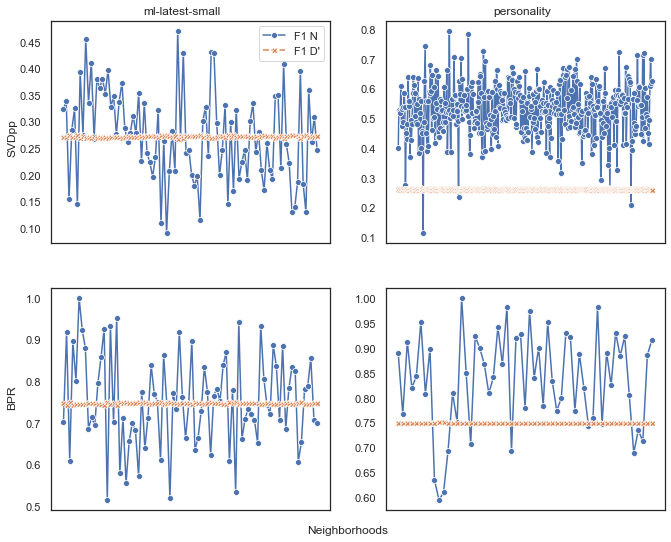

In [51]:
sns.set_theme(style="white") # white, dark, whitegrid, darkgrid, ticks
mls_bpr_f1 = melt_df(mls_bpr, ['f1_nbhd','f1_equiv'])
mls_lgcn_f1 = melt_df(mls_lgcn, ['f1_nbhd','f1_equiv'])
personality_bpr_f1 = melt_df(personality_bpr, ['f1_nbhd','f1_equiv'])
personality_lgcn_f1 = melt_df(personality_lgcn, ['f1_nbhd','f1_equiv'])

fig, ax = plt.subplots(2,2, figsize=(11, 9))

sns.lineplot(x=mls_bpr_f1.Index, y="Value", hue="Variable", data=mls_bpr_f1, ax=ax[0,0], markers=True, style="Variable")
sns.lineplot(x=mls_lgcn_f1.Index, y="Value", hue="Variable", data=mls_lgcn_f1, ax=ax[1,0], markers=True, style="Variable")
sns.lineplot(x=personality_bpr_f1.Index, y="Value", hue="Variable", data=personality_bpr_f1, ax=ax[0,1], markers=True, style="Variable")
sns.lineplot(x=personality_lgcn_f1.Index, y="Value", hue="Variable", data=personality_lgcn_f1, ax=ax[1,1], markers=True, style="Variable")

# Legend labels
ax[0,0].legend(labels=['F1 N', 'F1 D\''])

fig.text(0.5, 0.09, 'Neighborhoods', ha='center')
fig.text(0.29, 0.89, 'ml-latest-small', ha='center')
fig.text(0.72, 0.89, 'personality', ha='center')
fig.text(0.07, 0.3, 'BPR', va='center', rotation='vertical')
fig.text(0.07, 0.7, 'SVDpp', va='center', rotation='vertical')

for i in range(0, 2):
    for j in range(0, 2):
        # remove all x and y labels
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)

        # remove x-axis
        ax[i,j].set(xticklabels=[])

        # only keep legend for first row
        if j == 0 and i == 0:
            continue
        ax[i,j].get_legend().remove()

plt.savefig('./output/ranking_algo_exp/exp_3_scatter.png', dpi=800, bbox_inches='tight')

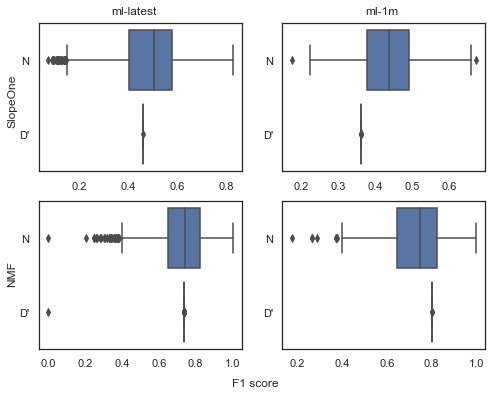

In [42]:
fig, ax = plt.subplots(2,2, figsize=(8, 6))

# bigger datasets - use box plots
ml_bpr_f1 = ml_bpr[['f1_nbhd','f1_equiv']].rename(columns={'f1_nbhd':'N', 'f1_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
ml_lgcn_f1 = ml_lgcn[['f1_nbhd','f1_equiv']].rename(columns={'f1_nbhd':'N', 'f1_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
ml1m_bpr_f1 = ml1m_bpr[['f1_nbhd','f1_equiv']].rename(columns={'f1_nbhd':'N', 'f1_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
ml1m_lgcn_f1 = ml1m_lgcn[['f1_nbhd','f1_equiv']].rename(columns={'f1_nbhd':'N', 'f1_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)

sns.boxplot(x="Value", y="Variable", data=ml_bpr_f1, ax=ax[0,0])
sns.boxplot(x="Value", y="Variable", data=ml_lgcn_f1, ax=ax[1,0])
sns.boxplot(x="Value", y="Variable", data=ml1m_bpr_f1, ax=ax[0,1])
sns.boxplot(x="Value", y="Variable", data=ml1m_lgcn_f1, ax=ax[1,1])


fig.text(0.5, 0.04, 'F1 score', ha='center')
fig.text(0.29, 0.9, 'ml-latest', ha='center')
fig.text(0.72, 0.9, 'ml-1m', ha='center')
fig.text(0.07, 0.3, 'NMF', va='center', rotation='vertical')
fig.text(0.07, 0.7, 'SlopeOne', va='center', rotation='vertical')


for i in range(0, 2):
    for j in range(0, 2):
        # remove all x and y labels
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)

plt.savefig('./output/ranking_algo_exp/exp_3_box.png', dpi=800, bbox_inches='tight')

C:\Users\Wissam Al Jurdi\AppData\Local\Temp\ipykernel_2784\3408451072.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = df_2.append(df_1)


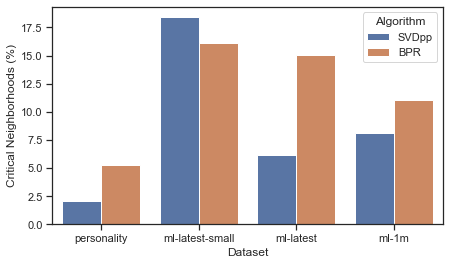

In [48]:
bpr = {
    'Dataset': ['personality', 'ml-latest-small', 'ml-latest', 'ml-1m'],
    'perc_critical': [5.26, 16.07, 15.08, 11.08],
}

lgcn = {
    'Dataset': ['personality', 'ml-latest-small', 'ml-latest', 'ml-1m'],
    'perc_critical': [2.1, 18.41, 6.18, 8.14],
}

df_1 = pd.DataFrame(data=bpr)
df_2 = pd.DataFrame(data=lgcn)

df_1['Algorithm'] = 'BPR'
df_2['Algorithm'] = 'SVDpp'

test_df = df_2.append(df_1)

fig, ax =plt.subplots(figsize=(7, 4))
sns.set_theme(style="ticks") # white, dark, whitegrid, darkgrid, ticks

sns.barplot(x="Dataset", y="perc_critical", hue="Algorithm", data=test_df)

ax.set_xlabel("Dataset")
ax.set_ylabel("Critical Neighborhoods (%)")

plt.savefig('./output/ranking_algo_exp/exp_3_critical_nbhds.png', dpi=800, bbox_inches='tight')

In [ ]:
dfs = [mls_bpr, mls_lgcn]

# common in just 2
dfs_2 = [dfs[0]]
dfs_3 = [dfs[1]]
dfs_4 = [dfs[0], dfs[2]]

df_final_1 = ft.reduce(lambda left, right: pd.merge(left, right, on='uid'), dfs)

df_2_1 = ft.reduce(lambda left, right: pd.merge(left, right, on='uid'), dfs_2)
df_2_1 = df_2_1[~(df_2_1['uid'].isin(df_final_1.uid.to_list()))]
df_2_2 = ft.reduce(lambda left, right: pd.merge(left, right, on='uid'), dfs_3)
df_2_2 = df_2_2[~(df_2_2['uid'].isin(df_final_1.uid.to_list()))]
df_2_3 = ft.reduce(lambda left, right: pd.merge(left, right, on='uid'), dfs_4)
df_2_3 = df_2_3[~(df_2_3['uid'].isin(df_final_1.uid.to_list()))]

total_critical_nbhds = len(pd.concat(dfs))
total_df_final = round((len(df_final_1) / total_critical_nbhds) * 100, 2)
total_in_two = round((len(pd.concat([df_2_1, df_2_2, df_2_3])) / total_critical_nbhds) * 100, 2)
total_in_one = round(((total_critical_nbhds - (total_df_final + total_in_two)) / total_critical_nbhds) * 100, 2)

print('Total number of common in the three algos:', total_df_final)
print('Total number of common between two:', total_in_two)
print('Total number of critical in just one:', total_in_one)